<a href="https://colab.research.google.com/github/Naseem-Ananzeh/Ml2_Final_Project/blob/main/Final_Project_ML2_Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Libraries**



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#**Loading The Data**

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "creditcard.csv"

C_card = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mlg-ulb/creditcardfraud",
  file_path)

<ipython-input-11-71c1936db49a>:6: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  C_card = kagglehub.load_dataset(


In [ ]:
C_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
C_card.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
x_c = C_card.drop(['Class'], axis=1)

In [ ]:
scaler = StandardScaler()
x_scaled_c = scaler.fit_transform(x_c)

In [ ]:
pca = PCA()
x_pca_c = pca.fit_transform(x_scaled_c)

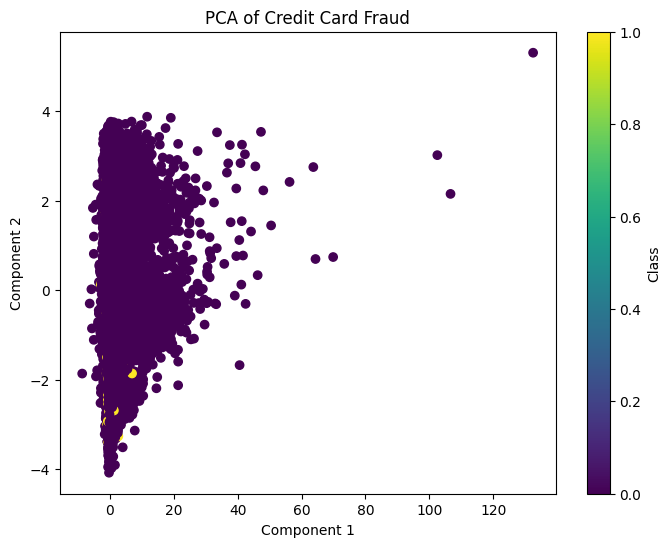

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(x_pca_c[:, 0], x_pca_c[:, 1], c=C_card['Class'])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA of Credit Card Fraud')
plt.colorbar(label='Class')
plt.show()

In [ ]:
tsne = TSNE(n_components=2, random_state=42)
x_tsne_c = tsne.fit_transform(x_scaled_c)

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter("x_tsne_before_c"[:, 0], "x_tsne_before_c"[:, 1])
plt.title('t-SNE before PCA')

plt.subplot(1, 2, 2)
plt.scatter("x_tsne_after_c"[:, 0], "x_tsne_after_c"[:, 1])
plt.title('t-SNE after PCA')

plt.show()